# Multi-core tracking example

Using multiple processors can accelerate tracking of a large number of particles. Currently, `LapTrack` supports `joblib` and `ray` backends.

In [ ]:
%pip install -q --upgrade -r requirements.txt

## Importing packages

`laptrack.LapTrack` is the core object for tracking. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from laptrack import LapTrack, ParallelBackend

## Data preparation

In [35]:
coords = np.cumsum(
    [np.random.normal(0, 0.5, size=(500, 3)) for _ in range(1000)], axis=0
)

findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic'

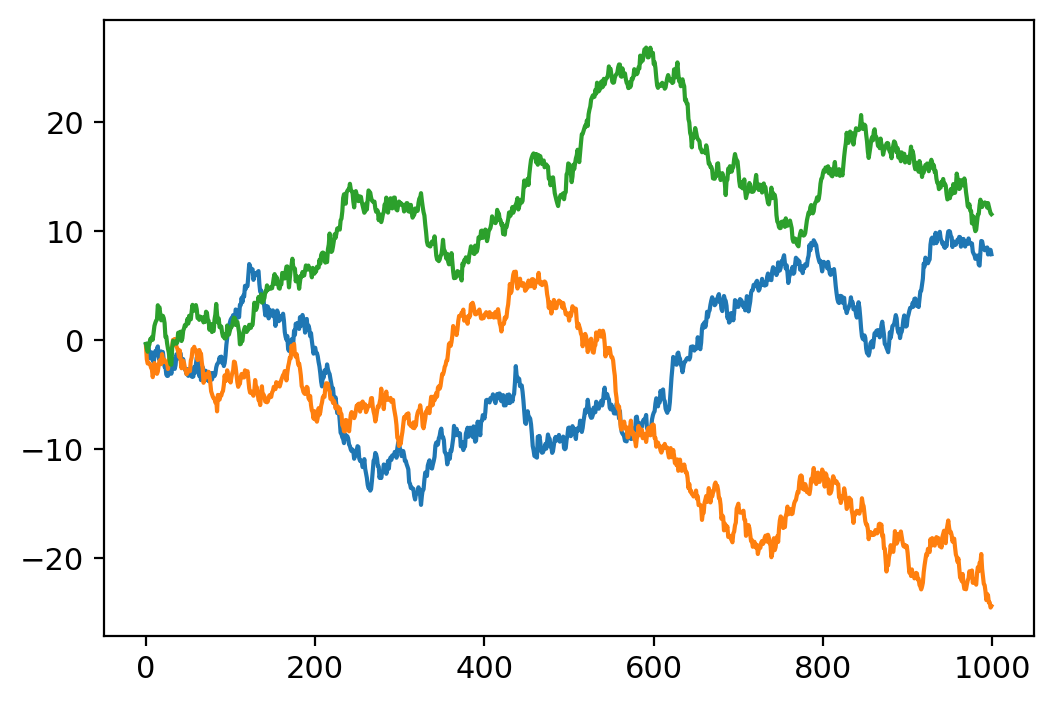

In [36]:
plt.plot(coords[:, 0])

## Serial tracking (default)

The parallelization method can be specified by the argument `parallel_backend`. 
The argument must be an item of `laptrack.ParallelBackend` or corresponding string.

By default, `LapTrack` uses single core for tracking (`laptrack.ParallelBackend.serial`).

In [34]:
lt = LapTrack(parallel_backend=ParallelBackend.serial, gap_closing_dist_metric=False)
%time lt.predict(coords)

CPU times: user 7.94 s, sys: 529 ms, total: 8.47 s
Wall time: 8.34 s


## Joblib

In [30]:
lt = LapTrack(parallel_backend=ParallelBackend.joblib)
%time lt.predict(coords)

KeyboardInterrupt: 

In [37]:
import ray

ray.shutdown()
ray.init(num_cpus=10)
lt = LapTrack(parallel_backend=ParallelBackend.ray, gap_closing_dist_metric=False)
%time lt.predict(coords)

2023-10-01 21:11:36,805	INFO worker.py:1625 -- Started a local Ray instance.


CPU times: user 11.8 s, sys: 1.28 s, total: 13.1 s
Wall time: 24.7 s
